In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

import pydotplus
import graphviz
from IPython.display import Image

In [2]:
df = pd.read_csv("projekt/houbicky_public_2020.csv")
df

,Unnamed: 0,cap-surface,gill-color,gill-spacing,gill-size,mashroom-pythonity,ring-number,stalk-root,cap-color,spore-print-color,...,stalk-color-above-ring,veil-color,habitat,stalk-shape,stalk-color-below-ring,bruises,cap-shape,veil-type,gill-attachment,class
0,0,f,w,c,b,64.0,o,b,g,k,...,p,w,d,t,p,t,f,p,f,e
1,1,y,NaN,c,b,9.0,t,b,e,w,...,e,w,w,e,w,f,b,p,f,e
2,2,f,g,c,b,84.0,o,b,y,h,...,p,w,g,e,n,f,f,p,f,p
3,3,f,g,c,b,42.0,o,b,y,h,...,b,w,p,e,b,f,f,p,f,e
4,4,f,w,c,b,92.0,o,b,e,n,...,p,w,d,t,g,t,f,p,f,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,6088,f,u,c,b,26.0,o,b,g,n,...,w,w,d,t,w,t,x,p,f,e
6089,6089,f,h,c,b,13.0,o,b,g,h,...,b,w,g,e,b,f,f,p,f,p
6090,6090,y,y,w,b,83.0,n,c,n,w,...,c,w,d,e,c,NaN,k,p,f,p
6091,6091,f,w,c,b,75.0,o,b,n,n,...,w,w,d,t,w,t,f,p,f,e


In [3]:
df.columns

Index(['Unnamed: 0', 'cap-surface', 'gill-color', 'gill-spacing', 'gill-size',
       'mashroom-pythonity', 'ring-number', 'stalk-root', 'cap-color',
       'spore-print-color', 'magical_property', 'odor', 'population',
       'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'veil-color', 'habitat', 'stalk-shape',
       'stalk-color-below-ring', 'bruises', 'cap-shape', 'veil-type',
       'gill-attachment', 'class'],
      dtype='object')

In [4]:
# drop columns which are not useful
df.drop(columns=["Unnamed: 0", "mashroom-pythonity", "magical_property"], inplace=True)

In [5]:
# inspect NAs
df.isna().sum()

cap-surface                 41
gill-color                  33
gill-spacing                68
gill-size                   60
ring-number                 59
stalk-root                  41
cap-color                   27
spore-print-color           22
odor                        36
population                  46
ring-type                   38
stalk-surface-above-ring    41
stalk-surface-below-ring    39
stalk-color-above-ring      30
veil-color                  55
habitat                     38
stalk-shape                 63
stalk-color-below-ring      26
bruises                     64
cap-shape                   31
veil-type                   94
gill-attachment             68
class                       55
dtype: int64

In [6]:
# drop rows with NAs
df.dropna(axis=0, inplace=True)
df

,cap-surface,gill-color,gill-spacing,gill-size,ring-number,stalk-root,cap-color,spore-print-color,odor,population,...,stalk-color-above-ring,veil-color,habitat,stalk-shape,stalk-color-below-ring,bruises,cap-shape,veil-type,gill-attachment,class
0,f,w,c,b,o,b,g,k,n,v,...,p,w,d,t,p,t,f,p,f,e
2,f,g,c,b,o,b,y,h,f,y,...,p,w,g,e,n,f,f,p,f,p
3,f,g,c,b,o,b,y,h,f,y,...,b,w,p,e,b,f,f,p,f,e
4,f,w,c,b,o,b,e,n,n,y,...,p,w,d,t,g,t,f,p,f,e
5,s,b,c,n,o,?,e,w,y,v,...,p,w,d,t,w,f,x,p,f,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,s,p,c,n,o,e,n,k,p,s,...,w,w,u,e,w,t,f,p,f,p
6088,f,u,c,b,o,b,g,n,n,v,...,w,w,d,t,w,t,x,p,f,e
6089,f,h,c,b,o,b,g,h,f,v,...,b,w,g,e,b,f,f,p,f,p
6091,f,w,c,b,o,b,n,n,n,v,...,w,w,d,t,w,t,f,p,f,e


In [7]:
# expect all unique values in dataset
columns = list(df)

for column in columns:
    print (df[column].unique()) 

['f' 's' 'y' 'g']
['w' 'g' 'b' 'u' 'p' 'k' 'h' 'n' 'o' 'y' 'e' 'r']
['c' 'w']
['b' 'n']
['o' 'n' 't']
['b' '?' 'c' 'e' 'r']
['g' 'y' 'e' 'w' 'n' 'p' 'b' 'c' 'r' 'u']
['k' 'h' 'n' 'w' 'u' 'o' 'y' 'r' 'b']
['n' 'f' 'y' 'a' 's' 'c' 'p' 'l' 'm']
['v' 'y' 's' 'a' 'c' 'n']
['p' 'l' 'e' 'n' 'f']
['s' 'k' 'f' 'y']
['s' 'k' 'y' 'f']
['p' 'b' 'w' 'g' 'n' 'o' 'c' 'y' 'e']
['w' 'n' 'o' 'y']
['d' 'g' 'p' 'm' 'l' 'u' 'w']
['t' 'e']
['p' 'n' 'b' 'g' 'w' 'o' 'c' 'e' 'y']
['t' 'f']
['f' 'x' 'b' 'k' 's' 'c']
['p']
['f' 'a']
['e' 'p']


In [8]:
# transform categorical column, y variable
df_edibility = df["class"]
df_edibility = df_edibility.replace({"e": 1, "p": 0})

In [9]:
# transform categorical columns, X variable
df_transform = df.drop("class", axis=1)
df_transform = pd.get_dummies(df_transform)
df_transform

,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,...,bruises_t,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,veil-type_p,gill-attachment_a,gill-attachment_f
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
6088,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
6089,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
6091,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [10]:
y = df_edibility
X = df_transform 

print(X.columns)
print(y.name)

Index(['cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n',
       ...
       'bruises_t', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'veil-type_p', 'gill-attachment_a',
       'gill-attachment_f'],
      dtype='object', length=117)
class


In [11]:
# Split dataset to 80% train and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [12]:
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=1)

In [13]:
clf_train = dt.fit(X_train, y_train)

In [14]:
y_pred = dt.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.8320683111954459

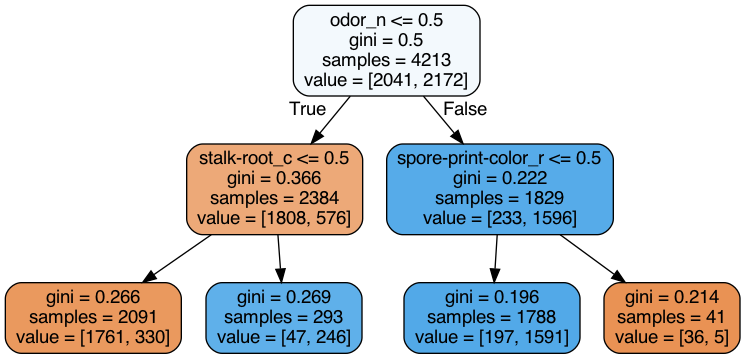

In [18]:
# Export decision tree in DOT fromat
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X.columns.values),
                               rounded=True, filled=True)
#print(dot_data)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())